# ElasticNet Regression

### Complexity: O(n.m.m)

n = samples

m = features

In [1]:
import pandas as pd

seed = 's1'

# Double Pole
base = '../../../../datalake/data_baseline/data/xdpole/initialconditions'
n_features = 6

ic = pd.read_csv(f"{base}/{seed}_run.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features = ic.columns[[i for i in range(n_features)]]
target = 'performance'
X, y = ic[features], ic[target]

start = 1000 * 10
X, y = X[start:], y[start:]
X = PolynomialFeatures(2).fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
import numpy as np
from sklearn import linear_model
reg = linear_model.ElasticNetCV(alphas=np.logspace(-100, 100, 100), cv=10)
reg.fit(X_train, y_train)

/home/ventura/research/data-analysis/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1647275.857698679, tolerance: 315649.9408230531
  model = cd_fast.enet_coordinate_descent_gram(
/home/ventura/research/data-analysis/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644010730.6062869, tolerance: 315649.9408230531
  model = cd_fast.enet_coordinate_descent_gram(
/home/ventura/research/data-analysis/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711289681.9767457, tolerance: 315649.9408230531
  model = cd_fast.enet_coordinate_descent_gram(
/home/vent

ElasticNetCV(alphas=array([1.00000000e-100, 1.04761575e-098, 1.09749877e-096, 1.14975700e-094,
       1.20450354e-092, 1.26185688e-090, 1.32194115e-088, 1.38488637e-086,
       1.45082878e-084, 1.51991108e-082, 1.59228279e-080, 1.66810054e-078,
       1.74752840e-076, 1.83073828e-074, 1.91791026e-072, 2.00923300e-070,
       2.10490414e-068, 2.20513074e-066, 2.31012970e-064, 2.42012826e-062,
       2.5...
       3.43046929e+053, 3.59381366e+055, 3.76493581e+057, 3.94420606e+059,
       4.13201240e+061, 4.32876128e+063, 4.53487851e+065, 4.75081016e+067,
       4.97702356e+069, 5.21400829e+071, 5.46227722e+073, 5.72236766e+075,
       5.99484250e+077, 6.28029144e+079, 6.57933225e+081, 6.89261210e+083,
       7.22080902e+085, 7.56463328e+087, 7.92482898e+089, 8.30217568e+091,
       8.69749003e+093, 9.11162756e+095, 9.54548457e+097, 1.00000000e+100]),
             cv=10)

<Axes: ylabel='Count'>

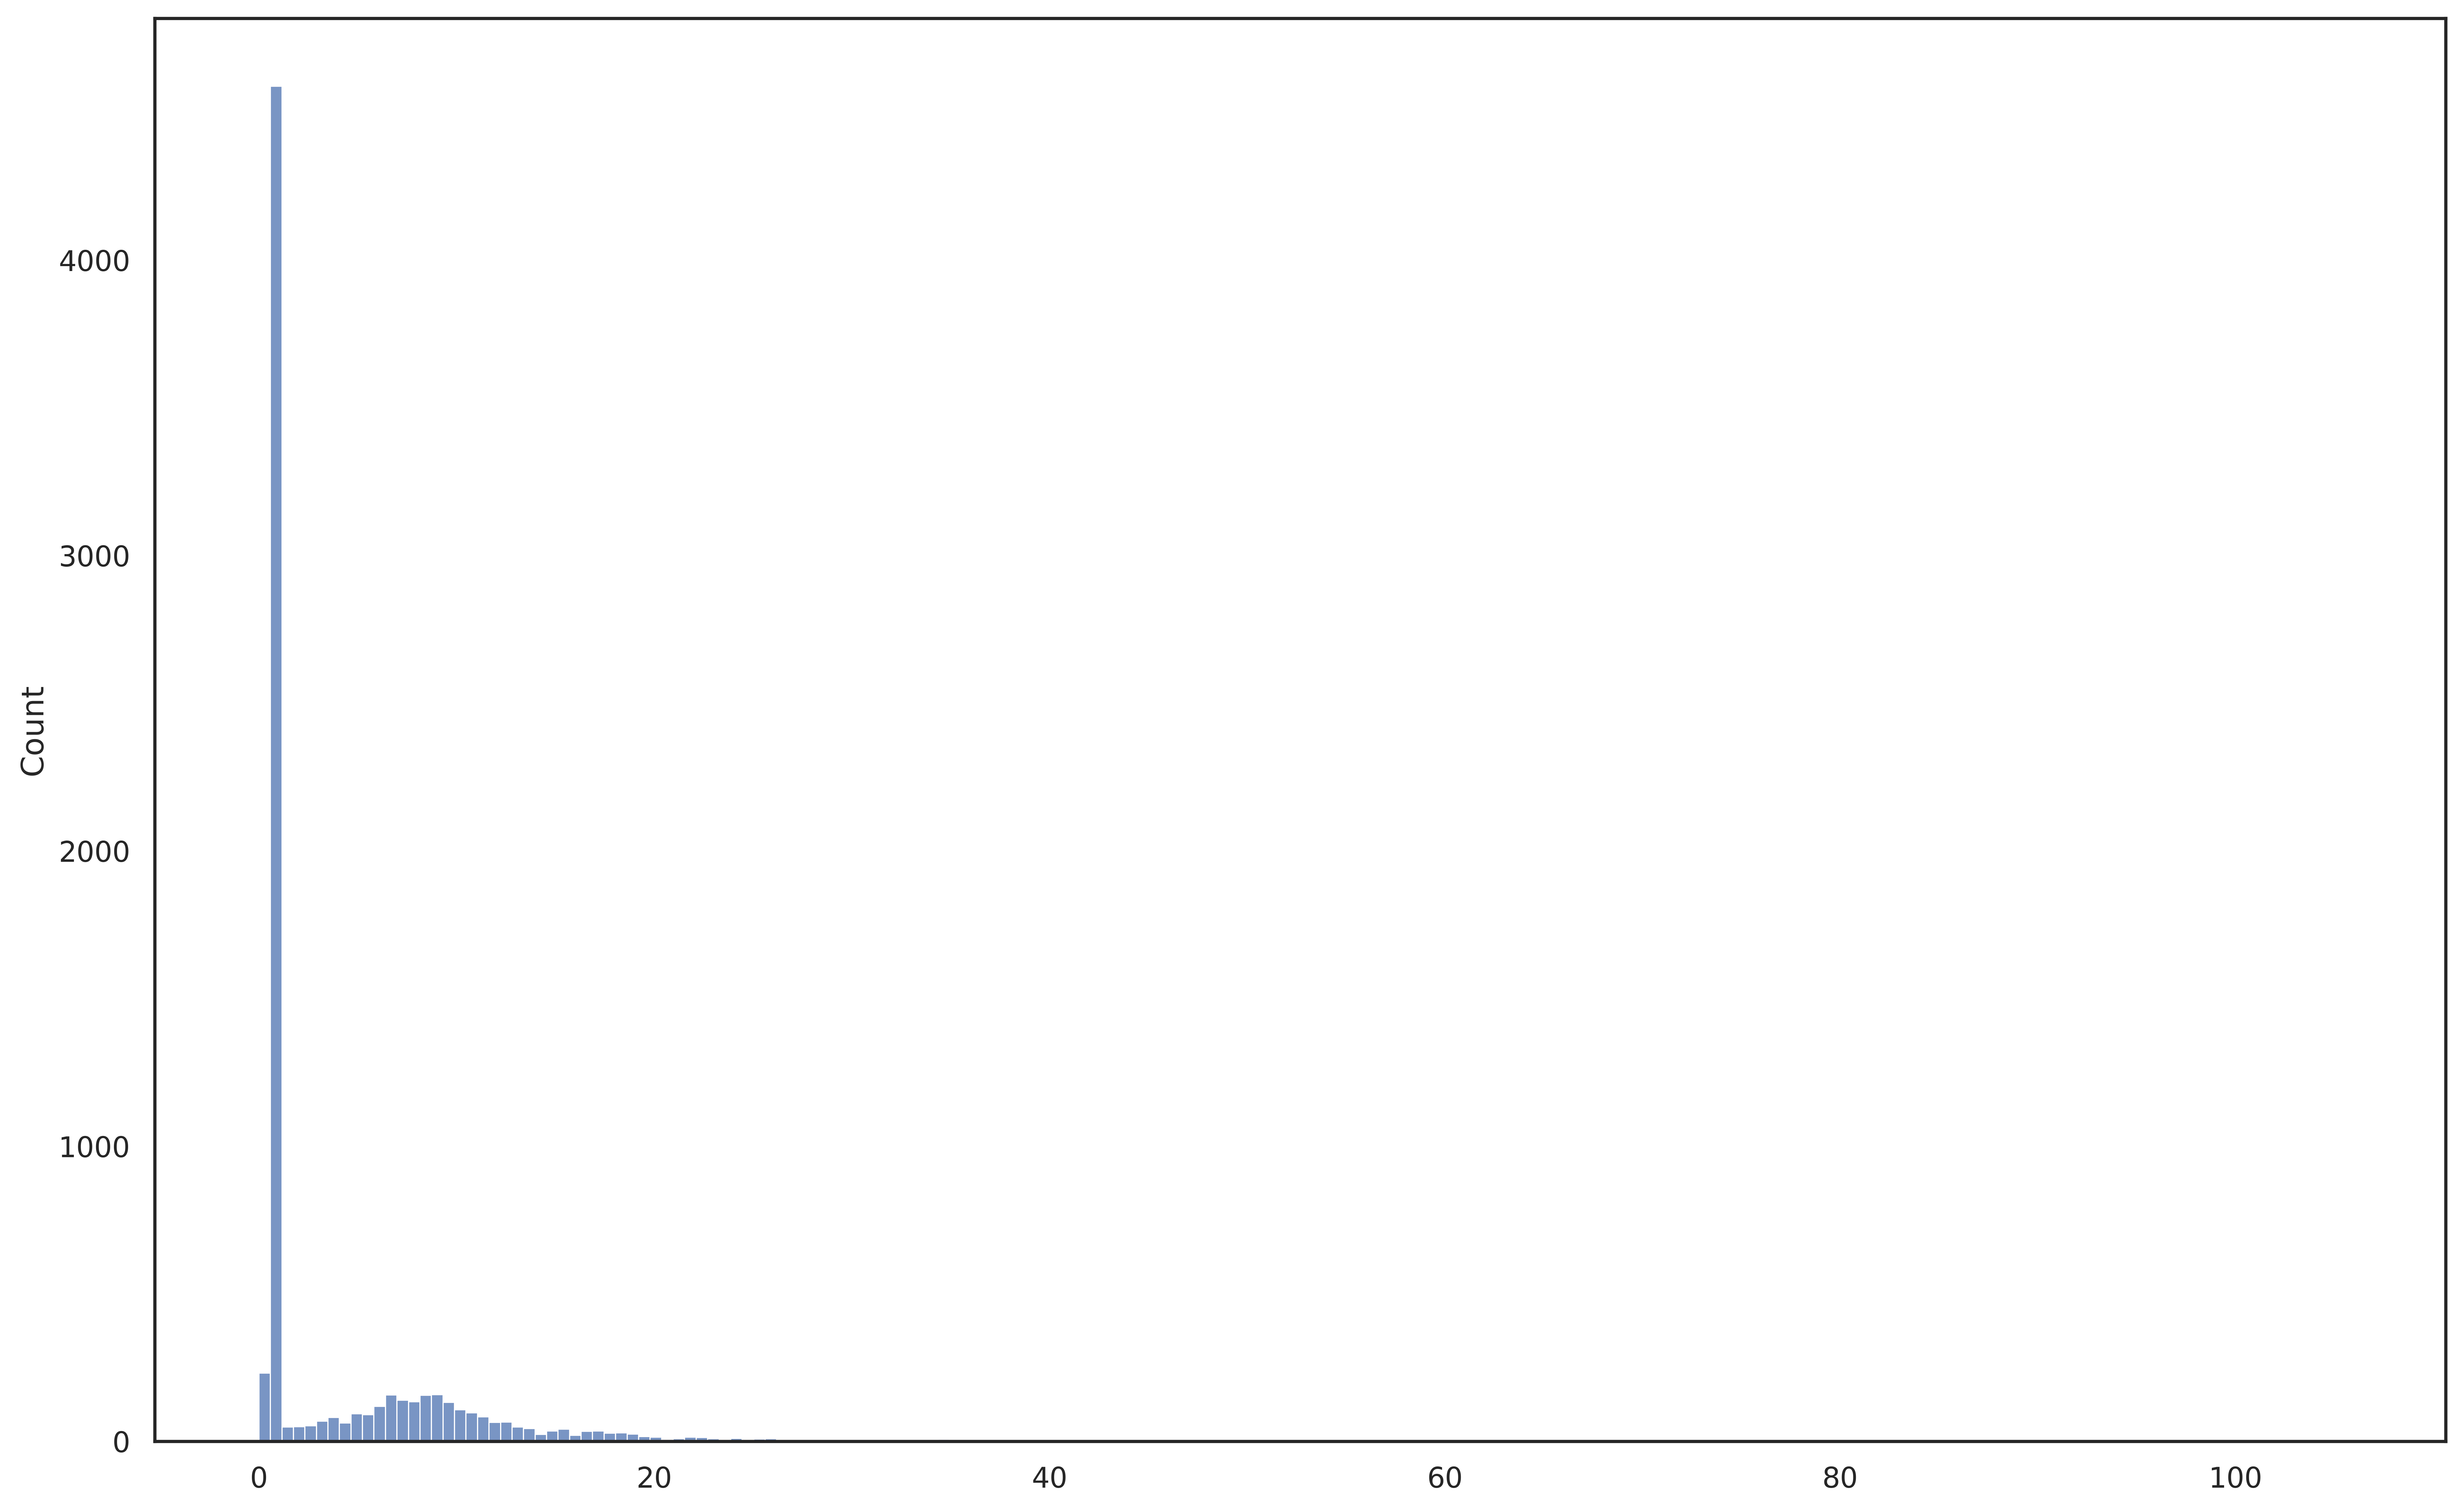

In [4]:
import seaborn as sns
from utils import graph_defaults
graph_defaults()

y_pred = reg.predict(X_test)
r = [abs(y_pred[i]/y_test.iloc[i]) for i in range(len(y_test))]

sns.histplot(r)

In [5]:
from critic import evolution

def model(X=[], y=[]):
    m = linear_model.ElasticNet(alpha=reg.alpha_)
    if len(X) + len(y) > 0:
        m.fit(X,y)
    return m

s, p, t = evolution(X, y, model, batch=100)
print(t)

101.600400672


<Axes: >

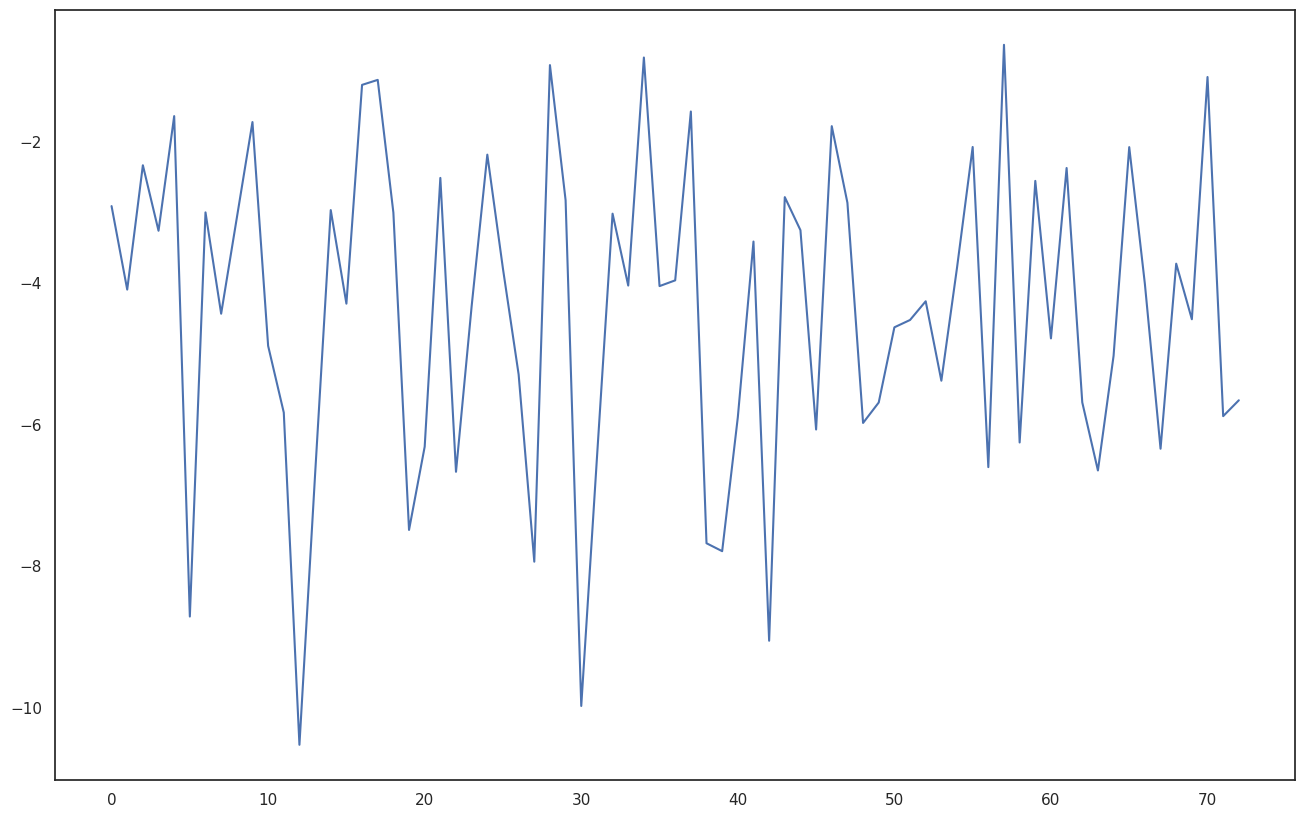

In [6]:
sns.lineplot(s)

<Axes: >

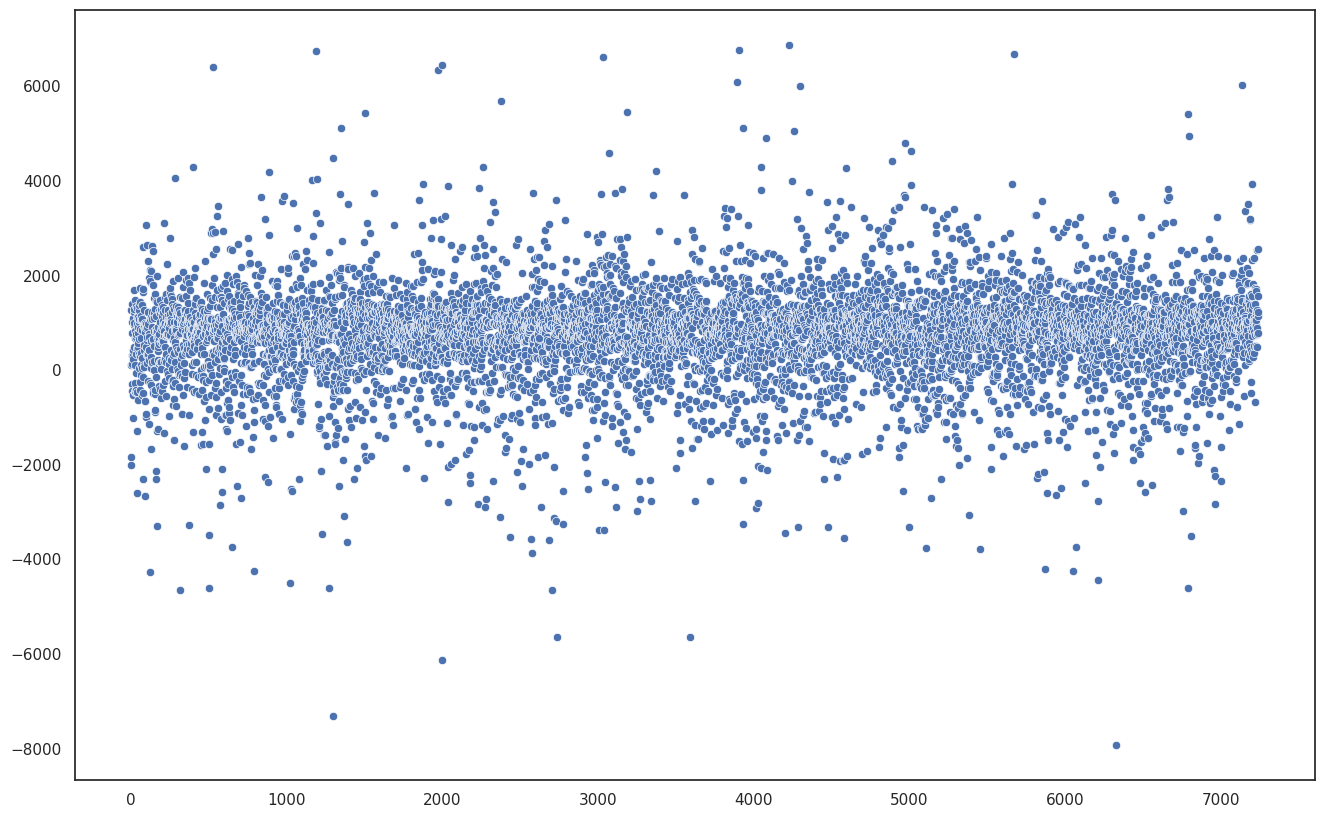

In [7]:
p = [yp for gen in p for yp in gen]

sns.scatterplot(p)

<Axes: >

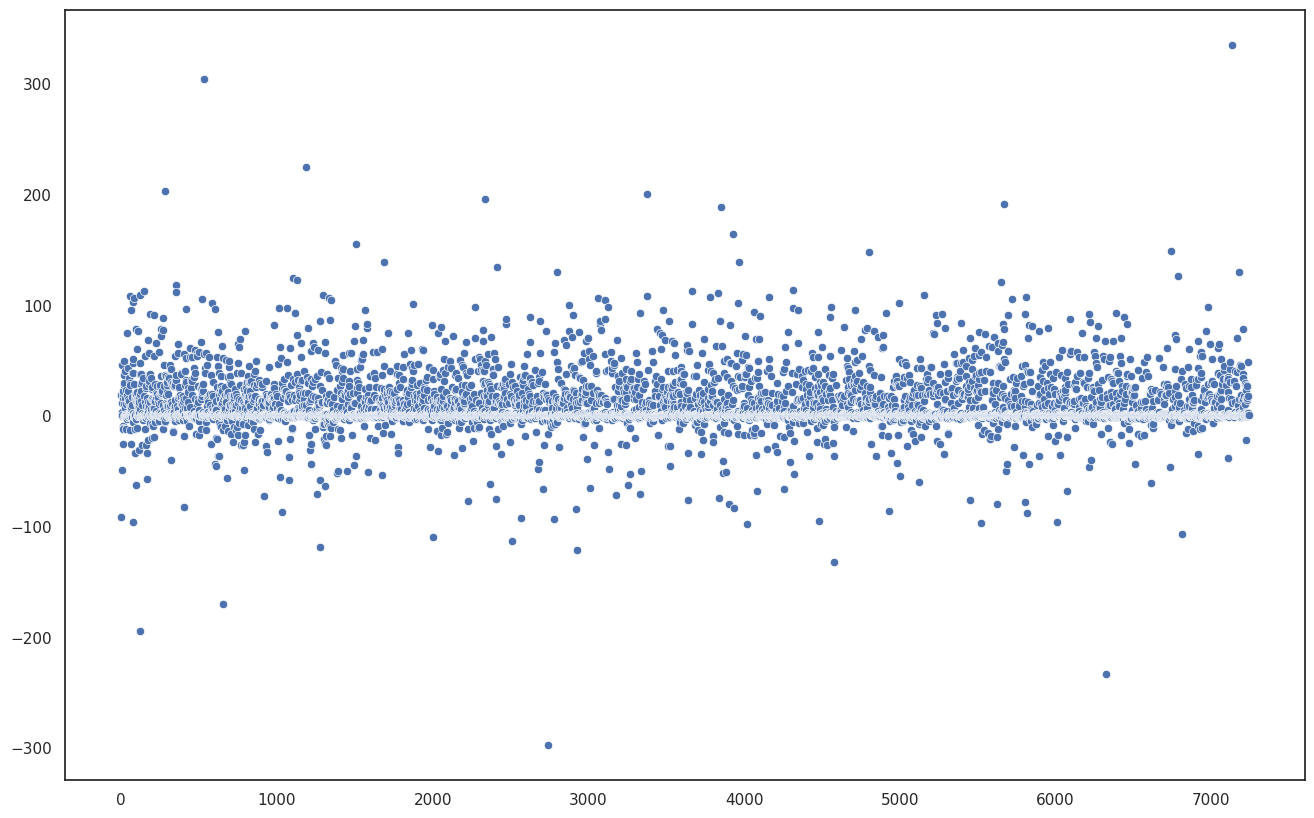

In [8]:
yt = [y[i] for i in range(start+1, len(y), 2)]

e = [p[i]/yt[i] for i in range(len(p))]
sns.scatterplot(e)

<Axes: ylabel='Count'>

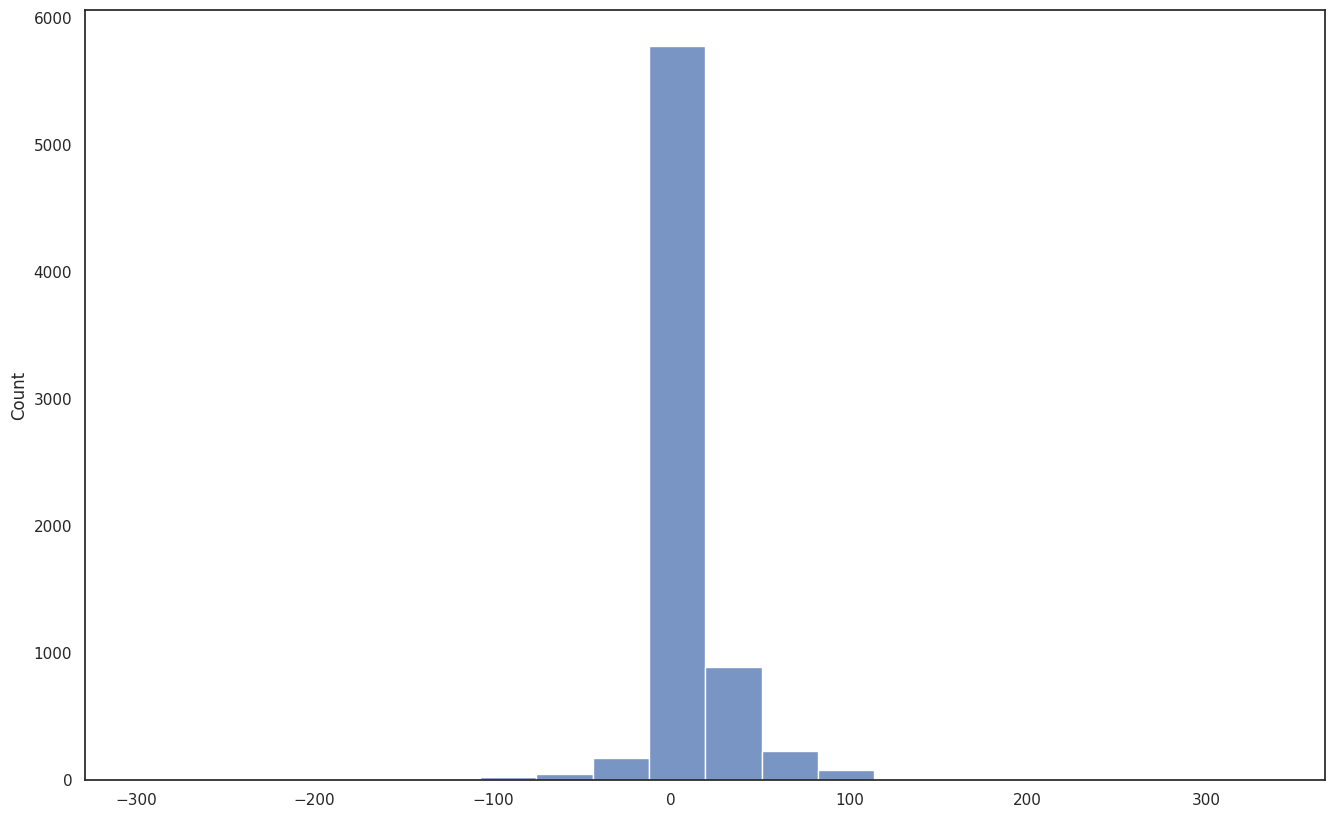

In [9]:
sns.histplot(e, bins=20)

In [10]:
e_df = pd.DataFrame(e)
e_df.columns = ["e"]

e_clean = e_df.query("-1 < e <= 1")
e_outliers = e_df.query("1 < e or e <= -1")

print("outliers", len(e_outliers))
print("near", len(e_clean))

outliers 4669
near 2571


array([[<Axes: title={'center': 'e'}>]], dtype=object)

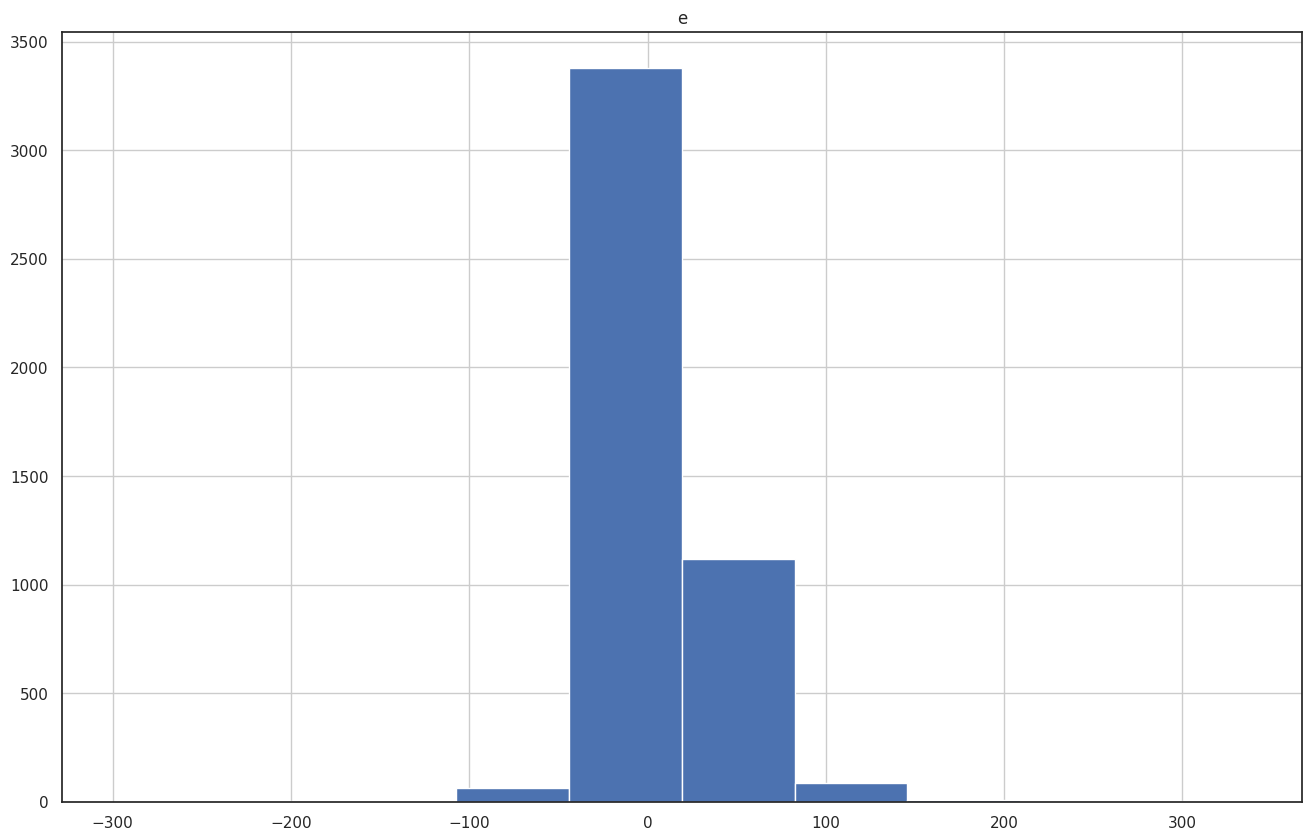

In [11]:
e_outliers.hist()

array([[<Axes: title={'center': 'e'}>]], dtype=object)

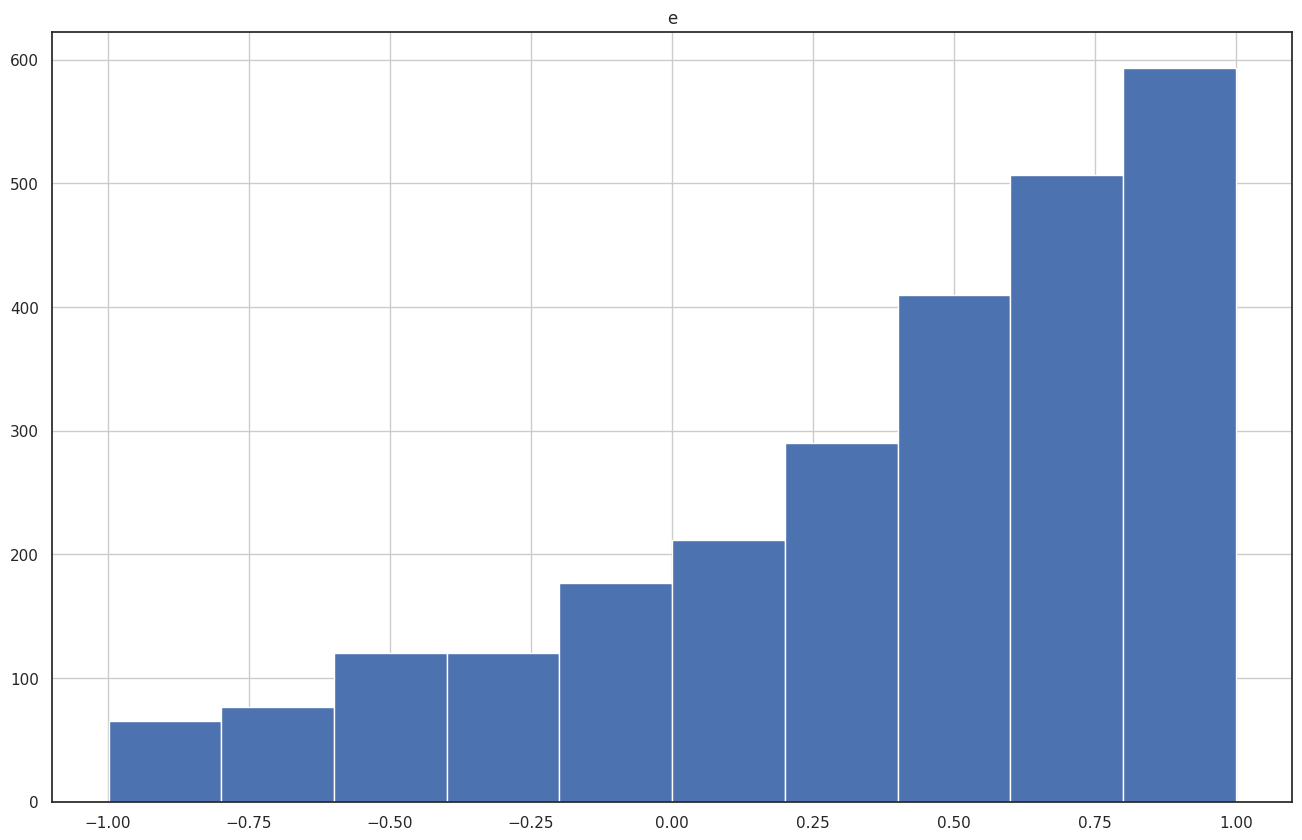

In [12]:
e_clean.hist()